In [160]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
data = pd.merge(ride , city)
# Display the data table for preview
data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [161]:
bubble_plot = data[['ride_id','city']].groupby(['city']).count()
bubble_plot = bubble_plot.rename(columns={'ride_id':"Total Number of Rides (Per City)"})

In [162]:
fare = data[['city','fare']].groupby(['city']).mean()
fare = fare.rename(columns = {"fare":"Average Fare ($)"})

In [163]:
city.index = city['city']

In [164]:
# combine
bubble_data = pd.merge(fare, bubble_plot, left_index=True, right_index= True)

In [165]:
bubble_data = pd.merge(bubble_data, city, left_index= True , right_index= True)

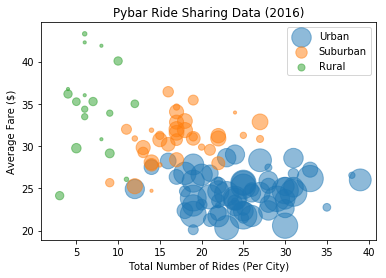

In [167]:
# Obtain the x and y coordinates for each of the three city types
# calculate total number of rides

# Calculate average fair

# Build the scatter plots for each city types

plt.scatter(x = bubble_data.loc[bubble_data.type == "Urban",'Total Number of Rides (Per City)'],  y = bubble_data.loc[bubble_data.type == "Urban",'Average Fare ($)'],
            s =  bubble_data.loc[bubble_data.type == "Urban",'driver_count']*10, alpha = 0.5,
            label = "Urban")
plt.scatter(x = bubble_data.loc[bubble_data.type == "Suburban",'Total Number of Rides (Per City)'],  y = bubble_data.loc[bubble_data.type == "Suburban",'Average Fare ($)'],
             s =  bubble_data.loc[bubble_data.type == "Suburban",'driver_count']*10, alpha = 0.5,
            label = "Suburban")
plt.scatter(x = bubble_data.loc[bubble_data.type == "Rural",'Total Number of Rides (Per City)'],  y = bubble_data.loc[bubble_data.type == "Rural",'Average Fare ($)'],
             s =  bubble_data.loc[bubble_data.type == "Rural",'driver_count']*10, alpha = 0.5,
            label = "Rural")

# Incorporate the other graph properties

# Create a legend
plt.legend()
# Incorporate a text label regarding circle size
plt.title("Pybar Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Save Figure
plt.savefig("Pybar Ride Sharing Data (2016).png")

## Total Fares by City Type

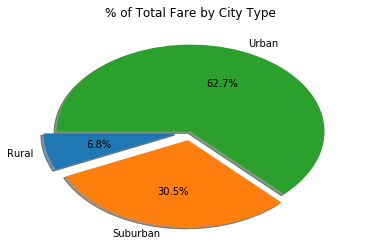

In [168]:
# Calculate Type Percents
tot_city = data[['type','fare']].groupby(['type']).sum()
tot_city["Percentage"] =( tot_city.fare / tot_city.fare.sum())*100
tot_city
# Build Pie Chart

# Build Pie Charts
plt.pie(tot_city['Percentage'], labels= tot_driver.index, startangle=180, explode=(0.1,0.1,0), 
        shadow=True,  autopct='%1.1f%%')
plt.title("% of Total Fare by City Type")

# Save Figure
plt.savefig("% of Total Fare by City Type.png")


## Total Rides by City Type

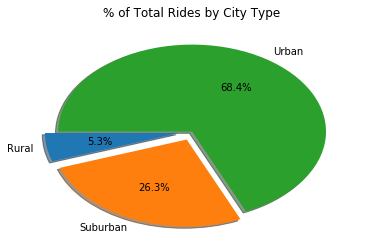

In [170]:
# Calculate Ride Percents
tot_driver = data[['type','ride_id']].groupby(['type']).count()

tot_driver['Percentage'] =( tot_driver.ride_id / tot_driver.ride_id.sum()) * 100
# Build Pie Chart


# Build Pie Charts
plt.pie(tot_driver['Percentage'], labels= tot_driver.index, startangle=180, explode=(0.1,0.1,0), 
        shadow=True,  autopct='%1.1f%%')
plt.title("% of Total Rides by City Type")
# Save Figure

# Save Figure
plt.savefig("% of Total Rides by City Type.png")


## Total Drivers by City Type

In [171]:
# Calculate Driver Percents
tot_driver = data[['type','driver_count']].groupby(['type']).sum()

tot_driver['Percentage'] =( tot_driver.driver_count / tot_driver.driver_count.sum()) * 100

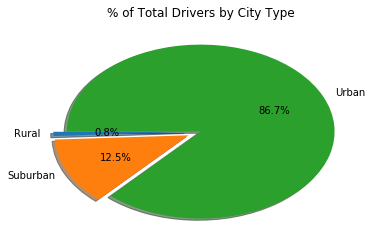

In [172]:


# Build Pie Charts
plt.pie(tot_driver['Percentage'], labels= tot_driver.index, startangle=180, explode=(0.1,0.1,0), 
        shadow=True,  autopct='%1.1f%%')
plt.title("% of Total Drivers by City Type")
# Save Figure

plt.savefig("% of Total Drivers by City Type.png")

# Written description of three observable trends based on the data.

* Average fare and total number of rides is lower for Urban Cities.
* From the "Bubble Plot of Ride Sharing Data" we can see that as the total number of rides increases average fair decreases. There is a negative relationship between total number of rides and average fare.
* Highest fare is paid by the Urban passenger.
* Most of the rides and  drivers are from Urban city.